<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/train_ConvLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

SyntaxError: ignored

In [1]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 581, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 581 (delta 2), reused 0 (delta 0), pack-reused 573
Receiving objects: 100% (581/581), 226.77 MiB | 30.21 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking out files: 100% (210/210), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 4.9 MB/s 


In [3]:
import os 
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *

In [5]:
import tensorflow as tf
import os
import numpy as np
import random 

SEED = 42

In [6]:
# Call the above function with seed value
set_global_determinism(seed=SEED)

In [7]:
import random as python_random
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(SEED)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(SEED)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(SEED)

In [8]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


In [9]:
# transform the output date into categorical (one-hot-encoding) and print the updated shapes
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

n_timesteps, n_features, N_OUTPUTS = trainX.shape[1], trainX.shape[2], trainy.shape[1]

n_steps, n_length = 4, 32

# define the inout share for the LSTM model
INPUT_SHAPE=(n_timesteps,n_features)

# reshape into subsequences (samples, time steps, rows, cols, channels)
trainX = trainX.reshape((trainX.shape[0], n_steps, 1, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

# define input variable for the k-fold CV and the model estimation functions
Num_Epochs_Search = 40
Num_Epochs_Fit = 40
Max_Trials = 10
Num_K_Folds = 5
Model_Name_ConvLSTM = "ConvLSTM"
batch_size = 64

# merge the train and test data to recreate the initial dataset for later
# splitting in the k-fold process
X_ConvLSTM = np.concatenate((trainX, testX),axis=0)
y_ConvLSTM = np.concatenate((trainy, testy),axis=0)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [10]:
Best_HP_ConvLSTM, Best_Epoch_ConvLSTM= k_fold_cv(X_ConvLSTM,
                                                              y_ConvLSTM,
                                                              ConvLSTM,
                                                              Model_Name_ConvLSTM,
                                                              INPUT_SHAPE,
                                                              N_OUTPUTS,
                                                              Max_Trials,
                                                              Num_Epochs_Search,
                                                              Num_Epochs_Fit,
                                                              Num_K_Folds)


Trial 10 Complete [00h 01m 14s]
val_accuracy: 0.8652912378311157

Best val_accuracy So Far: 0.9016990065574646
Total elapsed time: 00h 11m 33s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
206/206 [==============================] - 7s 24ms/step - loss: 0.9831 - accuracy: 0.6476 - val_loss: 0.6748 - val_accuracy: 0.6742
Epoch 2/40
206/206 [==============================] - 5s 22ms/step - loss: 0.4719 - accuracy: 0.8142 - val_loss: 0.5242 - val_accuracy: 0.7652
Epoch 3/40
206/206 [==============================] - 5s 23ms/step - loss: 0.3591 - accuracy: 0.8667 - val_loss: 0.4807 - val_accuracy: 0.7925
Epoch 4/40
206/206 [==============================] - 5s 22ms/step - loss: 0.2876 - accuracy: 0.8929 - val_loss: 0.4085 - val_accuracy: 0.8252
Epoch 5/40
206/206 [==============================] - 5s 23ms/step - loss: 0.2379 - accuracy: 0.9173 - val_loss: 0.3750 - val_accuracy: 0.8368
Epoch 6/40
206/206 [==============================] - 5s 23ms/step - loss: 0.2104 - accuracy: 0.9258 - v

In [11]:
# Print the hyperparameters that yielded the best model all over the k-folds
Best_HP_ConvLSTM.get_config()['values']

{'dense_activation': 'relu',
 'dropout_1': 0.05,
 'dropout_2': 0.0,
 'learning_rate': 0.01,
 'num_filters': 64,
 'units': 32}

Epoch 1/34
184/184 [==============================] - 10s 44ms/step - loss: 0.4251 - accuracy: 0.8349 - val_loss: 0.4070 - val_accuracy: 0.9007
Epoch 2/34
184/184 [==============================] - 8s 41ms/step - loss: 0.1391 - accuracy: 0.9441 - val_loss: 0.8232 - val_accuracy: 0.9055
Epoch 3/34
184/184 [==============================] - 8s 42ms/step - loss: 0.1573 - accuracy: 0.9403 - val_loss: 0.4435 - val_accuracy: 0.9218
Epoch 4/34
184/184 [==============================] - 7s 40ms/step - loss: 0.1186 - accuracy: 0.9503 - val_loss: 0.5207 - val_accuracy: 0.9028
Epoch 5/34
184/184 [==============================] - 7s 39ms/step - loss: 0.1055 - accuracy: 0.9561 - val_loss: 0.6412 - val_accuracy: 0.9089
Epoch 6/34
184/184 [==============================] - 7s 39ms/step - loss: 0.2599 - accuracy: 0.9322 - val_loss: 0.5931 - val_accuracy: 0.9116
Epoch 7/34
184/184 [==============================] - 7s 40ms/step - loss: 0.1263 - accuracy: 0.9514 - val_loss: 0.6007 - val_accuracy: 0.908

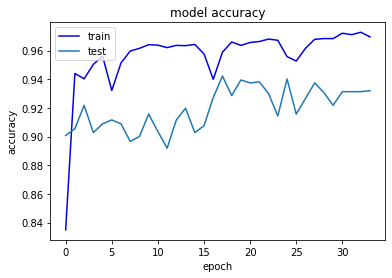

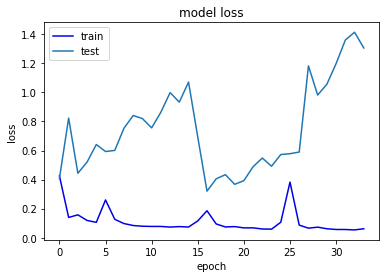

The accuracy of the model is 0.9053274393081665


In [12]:
# Build a new model with the HP, train it with the inital training set and eveluate it with the test set 

BestModelConvLSTM, ConvLSTM_accuracy = evaluate_model(trainX,
                               trainy,
                               testX,
                               testy,
                               INPUT_SHAPE,
                               N_OUTPUTS,
                               Best_HP_ConvLSTM,
                               ConvLSTM,
                               Best_Epoch_ConvLSTM,
                               batch_size)


In [13]:
# create a unique file name by attaching the first four accuracy digits

file_name_ending = str(int(ConvLSTM_accuracy * 10000))

In [14]:
# save the model by using the unique file name (model name + accuracy)
BestModelConvLSTM.save("/content/CrispCerebella/Models/Final_Model_ConvLSTM_" + file_name_ending)

INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/assets


INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/assets


In [15]:
# create a zip file out of the saved model

!zip -r /content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}.zip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}

  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/variables/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/variables/variables.index (deflated 63%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/assets/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/keras_metadata.pb (deflated 81%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_9053/saved_model.pb (deflated 90%)


In [16]:
# downloading the zip file (to store it locally and be able to push it to git)

files.download(f"/content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# unzip the folder of the model with a given accuracy
# !unzip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}.zip -d /Test

In [18]:
# load the saved model
# test_model = keras.models.load_model(f'/content/CrispCerebella/Test/content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}')

In [19]:
# evaluate the saved model
# test_model.evaluate(testX, testy)